# Prueba 2 deberes TFG
- Utilizando todo el ss.

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from baro.anomaly_detection import bocpd
from baro.root_cause_analysis import robust_scorer
from baro.utility import drop_constant
from sklearn import datasets
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os


# Function to load data from multiple directories
def load_data_from_dirs(base_dir, sub_dirs, file_name):
    data_frames = []
    for sub_dir in sub_dirs:
        full_path = os.path.join(base_dir, sub_dir)
        for i in range(1, 6):
            file_path = os.path.join(full_path, str(i), file_name)
            if os.path.exists(file_path):
                df_temp = pd.read_csv(file_path)
                df_temp['file_origin'] = sub_dir
                data_frames.append(df_temp)
    return pd.concat(data_frames, ignore_index=True)

# Base directory and subdirectories
base_dir = '.'
sub_dirs = [
    'carts_cpu', 'carts_delay', 'carts_loss', 'carts_mem',
    'catalogue_cpu', 'catalogue_delay', 'catalogue_loss', 'catalogue_mem',
    'orders_cpu', 'orders_delay', 'orders_loss', 'orders_mem',
    'payment_cpu', 'payment_delay', 'payment_loss', 'payment_mem',
    'user_cpu', 'user_delay', 'user_loss', 'user_mem'
]

# Load data
df = load_data_from_dirs(base_dir, sub_dirs, 'new_data.csv')

# Display the number of rows and value counts
print("Número de filas en el DataFrame original:", df.shape[0])
print(df[['Abnormality Class', 'file_origin']].value_counts())



Número de filas en el DataFrame original: 72100
Abnormality Class  file_origin    
Abnormal           carts_cpu          1805
                   carts_delay        1805
                   carts_loss         1805
                   carts_mem          1805
                   catalogue_cpu      1805
                   catalogue_delay    1805
                   catalogue_loss     1805
                   catalogue_mem      1805
                   orders_cpu         1805
                   orders_delay       1805
                   orders_loss        1805
                   orders_mem         1805
                   payment_cpu        1805
                   payment_delay      1805
                   payment_loss       1805
                   payment_mem        1805
                   user_cpu           1805
                   user_delay         1805
                   user_loss          1805
                   user_mem           1805
Normal             carts_cpu          1800
              

In [ ]:


# Asignar la clase de anomalía dependiendo del archivo de origen
def assign_anomaly_class(row):
    if row['Abnormality Class'] == 'Abnormal':
        if row['file_origin'] == 'carts_cpu':
            return 'CPU HOG'
        elif row['file_origin'] == 'carts_mem':
            return 'MEM LEAK'
        elif row['file_origin'] == 'carts_loss':
            return 'Packet Loss'
        elif row['file_origin'] == 'carts_delay':
            return 'Packet Delay'
        elif row['file_origin'] == 'catalogue_cpu':
            return 'CPU HOG'
        elif row['file_origin'] == 'catalogue_mem':
            return 'MEM LEAK'
        elif row['file_origin'] == 'catalogue_loss':
            return 'Packet Loss'
        elif row['file_origin'] == 'catalogue_delay':
            return 'Packet Delay'
        elif row['file_origin'] == 'orders_cpu':
            return 'CPU HOG'
        elif row['file_origin'] == 'orders_mem':
            return 'MEM LEAK'
        elif row['file_origin'] == 'orders_loss':
            return 'Packet Loss'
        elif row['file_origin'] == 'orders_delay':
            return 'Packet Delay'
        elif row['file_origin'] == 'payment_cpu':
            return 'CPU HOG'
        elif row['file_origin'] == 'payment_mem':
            return 'MEM LEAK'
        elif row['file_origin'] == 'payment_loss':
            return 'Packet Loss'
        elif row['file_origin'] == 'payment_delay':
            return 'Packet Delay'
        elif row['file_origin'] == 'user_cpu':
            return 'CPU HOG'
        elif row['file_origin'] == 'user_mem':
            return 'MEM LEAK'
        elif row['file_origin'] == 'user_loss':
            return 'Packet Loss'
        elif row['file_origin'] == 'user_delay':
            return 'Packet Delay'
    return row['Abnormality Class']

df['Abnormality Class'] = df.apply(assign_anomaly_class, axis=1)


# Verificar los cambios
print(df[['Abnormality Class']].value_counts())

# Eliminar la columna 'file_origin'
if 'file_origin' in df.columns:
    df.drop(['file_origin'], axis=1, inplace=True)
#print(df.columns)



Abnormality Class
Normal               36000
Abnormal             28880
CPU HOG               1805
MEM LEAK              1805
Packet Delay          1805
Packet Loss           1805
Name: count, dtype: int64


In [3]:
df.head(5)

,time,carts_container-cpu-system-seconds-total,carts-db_container-cpu-system-seconds-total,catalogue_container-cpu-system-seconds-total,catalogue-db_container-cpu-system-seconds-total,front-end_container-cpu-system-seconds-total,orders_container-cpu-system-seconds-total,orders-db_container-cpu-system-seconds-total,payment_container-cpu-system-seconds-total,queue-master_container-cpu-system-seconds-total,...,192-168-18-57-9100_node-network-receive-drop-total,192-168-26-82-9100_node-network-receive-drop-total,192-168-53-168-9100_node-network-receive-drop-total,192-168-77-58-9100_node-network-receive-drop-total,192-168-95-91-9100_node-network-receive-drop-total,192-168-18-57-9100_node-network-transmit-drop-total,192-168-26-82-9100_node-network-transmit-drop-total,192-168-53-168-9100_node-network-transmit-drop-total,192-168-77-58-9100_node-network-transmit-drop-total,192-168-95-91-9100_node-network-transmit-drop-total
0,1.693068e+09,0.961682,0.334536,0.230996,0.045831,1.732266,0.962811,0.065308,0.022688,0.066647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.693068e+09,0.961682,0.334536,0.230996,0.045831,1.732266,0.962811,0.065308,0.022688,0.066647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.693068e+09,0.961682,0.334536,0.252195,0.045831,1.732266,0.817558,0.065308,0.022688,0.066647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.693068e+09,0.961682,0.334536,0.252195,0.045831,1.732266,0.801511,0.065308,0.022688,0.066647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.693068e+09,0.961682,0.334536,0.252195,0.045831,1.732266,0.785464,0.062441,0.022688,0.066647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,time,carts_container-cpu-system-seconds-total,carts-db_container-cpu-system-seconds-total,catalogue_container-cpu-system-seconds-total,catalogue-db_container-cpu-system-seconds-total,front-end_container-cpu-system-seconds-total,orders_container-cpu-system-seconds-total,orders-db_container-cpu-system-seconds-total,payment_container-cpu-system-seconds-total,queue-master_container-cpu-system-seconds-total,...,192-168-18-57-9100_node-network-receive-drop-total,192-168-26-82-9100_node-network-receive-drop-total,192-168-53-168-9100_node-network-receive-drop-total,192-168-77-58-9100_node-network-receive-drop-total,192-168-95-91-9100_node-network-receive-drop-total,192-168-18-57-9100_node-network-transmit-drop-total,192-168-26-82-9100_node-network-transmit-drop-total,192-168-53-168-9100_node-network-transmit-drop-total,192-168-77-58-9100_node-network-transmit-drop-total,192-168-95-91-9100_node-network-transmit-drop-total
count,7.198600e+04,71983.000000,71973.000000,71980.000000,71973.000000,71962.000000,71973.000000,71975.000000,71986.000000,71976.000000,...,2163.0,2163.0,2163.0,2163.0,2163.0,2163.0,2163.0,2163.0,2163.0,2163.0
mean,1.693146e+09,1.031108,0.358160,0.527233,0.066929,1.610055,0.871539,0.084707,0.154915,0.119029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.248302e+04,3.302328,0.089835,2.230028,0.029239,0.190522,2.124554,0.064372,0.375580,0.048961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.693068e+09,0.025648,0.000000,0.000000,0.000000,0.532752,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.693102e+09,0.411086,0.299085,0.125000,0.045616,1.495904,0.456437,0.042723,0.046924,0.084276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.693137e+09,0.501301,0.349841,0.171686,0.064802,1.620398,0.535540,0.063321,0.083389,0.114145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.693190e+09,0.618364,0.407020,0.239271,0.084904,1.730058,0.632363,0.102135,0.142300,0.149072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.693255e+09,24.187637,0.937009,16.367533,0.232602,2.454019,17.461416,0.373715,3.144217,0.394700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# DataFrame with Abnormality Class == 'Normal'
df_normal = df[df['Abnormality Class'] == 'Normal']

# DataFrame with the rest of the Abnormality Classes
df_abnormal = df[df['Abnormality Class'] != 'Normal']

# Display the shapes of the new DataFrames
print("Shape of df_normal:", df_normal.shape)
print("Shape of df_abnormal:", df_abnormal.shape)
null_count1 = df_normal.isnull().sum().sum()
print('Number of null values in df_normal:', null_count1)
null_count2 = df_abnormal.isnull().sum().sum()
print('Number of null values in df_abnormal:', null_count2)

Shape of df_normal: (36000, 637)
Shape of df_abnormal: (36100, 637)
Number of null values in df_normal: 7135780
Number of null values in df_abnormal: 7185392


In [ ]:
# Create a mapping for the abnormal classes
abnormal_mapping = {
    'CPU HOG': 2.1,
    'MEM LEAK': 2.2,
    'Packet Loss': 2.3,
    'Packet Delay': 2.4
}

# Apply the mapping to the 'Abnormality Class' column
df['Abnormality Class'] = df['Abnormality Class'].replace(abnormal_mapping)
df['Abnormality Class'] = df['Abnormality Class'].replace('Normal', 1)

# Verify the changes
print(df['Abnormality Class'].value_counts())

df.to_csv('./processed_data_combined.csv', index=False)

Abnormality Class
1           36000
Abnormal    28880
2.1          1805
2.4          1805
2.3          1805
2.2          1805
Name: count, dtype: int64


LR: 0.994368530020704 (0.004349478176760601)
LDA: 0.993502729154903 (0.003989109862550577)
KNN: 0.9631639375117634 (0.01678571280178537)
CART: 0.9965349143610013 (0.005048769136697535)
NB: 0.8998531902879728 (0.016385141472787933)
SVM: 0.501082251082251 (0.00145199219318167)


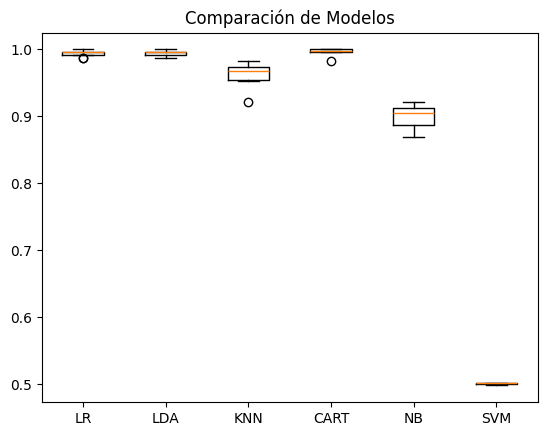

Exactitud: 0.9930675909878682
Matriz de Confusión:
 [[282   2]
 [  2 291]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       284
           2       0.99      0.99      0.99       293

    accuracy                           0.99       577
   macro avg       0.99      0.99      0.99       577
weighted avg       0.99      0.99      0.99       577



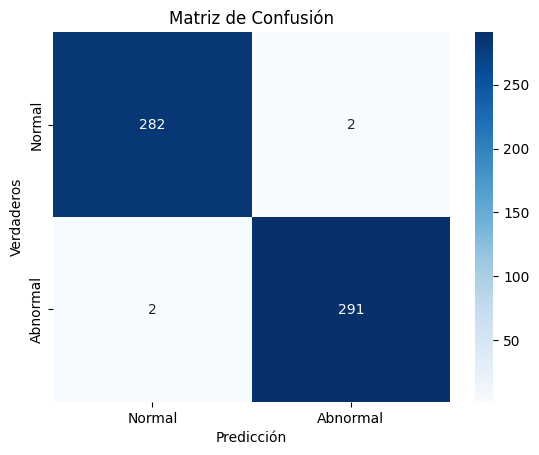

In [8]:
from sklearn.impute import KNNImputer

import seaborn as sns

# 3. Imputación de valores nulos (si es necesario)
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 4. Asignar las características (X) y la etiqueta (y)
X = df_imputed.drop('Abnormality Class', axis=1)
y = df_imputed['Abnormality Class']

# 5. Dividir los datos en conjunto de entrenamiento y validación (80% - 20%)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)
y_train = y_train.round().astype(int)
y_validation = y_validation.round().astype(int)
# 6. Definir los modelos a evaluar
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))  # Regresión Logística
models.append(('LDA', LinearDiscriminantAnalysis()))  # Linear Discriminant Analysis
models.append(('KNN', KNeighborsClassifier()))  # Clasificador de Vecinos Cercanos
models.append(('CART', DecisionTreeClassifier()))  # Árbol de Decisión
models.append(('NB', GaussianNB()))  # Naive Bayes Gaussiano
models.append(('SVM', SVC(gamma='auto')))  # Support Vector Machines

# 7. Evaluación de los modelos usando validación cruzada
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

# 8. Comparar los modelos
plt.boxplot(results, labels=names)
plt.title('Comparación de Modelos')
plt.show()

# 9. Entrenar el modelo seleccionado (Regresión Logística en este caso)
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)

# 10. Hacer predicciones con el conjunto de validación
predictions = model.predict(X_validation)
predictions = predictions.round().astype(int)

# 11. Evaluar las predicciones
print("Exactitud:", accuracy_score(y_validation, predictions))
print("Matriz de Confusión:\n", confusion_matrix(y_validation, predictions))
print("Reporte de Clasificación:\n", classification_report(y_validation, predictions))

# 12. Visualizar la matriz de confusión
cm = confusion_matrix(y_validation, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdaderos')
plt.show()
